# Predicting the number of your customers

## Introduction

Suppose you have a shop. Every month you count the total number of your customers who bought from your shop. To simplify, we think of people buying one unit from your shop or nothing. 


Your customers are of two types:
* some are "returning" customers (i.e. they also bought last month) and 
* the others are new (did not buy last month)

So we will not worry about customers who, say, bought two months ago but not last month.

In this notebook, we first generate the data ourselves (so that you fully understand the structure of the data) and then we analyze this data.

## Importing libraries

We first import the libraries that we need.

In [1]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Model

We will generate the data with the following model.

Let $x_t$ denote the logarithm of the number of customers in period $t$. We assume that $x_t$ evolves over time as follows:

$$
x_t = \rho x_{t-1} + u_t
$$

where $u_t$ is normally distributed with mean $\mu_u \geq 0$ and standard deviation $\sigma_u \geq 0$ and $\rho \in [0,1]$. Hence, there is a fraction $\rho$ of previous period customers that return to buy this period and there is an inflow $u_t$ of new customers in period $t$.


-------------

**Exercise**

What is an advantage of defining $x_t$ as the logarithm of the number of customers? [hint: what would you need to "worry" about if $x_t$ denotes the number of customers?]

--------------

We assume that both $\mu$ and $\rho$ are a function of the price that is charged. If you charge a high price, fewer customers will return and also the inflow of new customers will be lower.

We generate data for 24 months. The code below starts from today and generates dates with a Monthly frequency. We define how $\rho$ and $\mu$ depend on the price $p$ that the shop charges in a period.

Finally, we create a pandas dataframe `df_customers` with this data. 

In [2]:
number_of_periods = 24
todays_date = datetime.datetime.now().date()
index = pd.date_range(todays_date-datetime.timedelta(31*number_of_periods), periods=number_of_periods, freq='M')
columns = ['log number of customers']

def mu(m,p):
    return m*(1-p)

def rho(r,p):
    return r*(1-p)

sigma = 1.0

p_0 = [0.2]
p_1 = [0.6]
period_0 = 18
period_1 = number_of_periods+1-period_0
vector_p = period_0*p_0 + period_1*p_1

x_0 = 10
x = []
x.append(x_0)
for t in range(1,number_of_periods+1):
    u = np.random.normal(mu(2,vector_p[t]), sigma)
    x.append(rho(0.5,vector_p[t])*x[t-1]+u)
    
df_customers = pd.DataFrame(x[1:], index=index, columns=columns)

In [3]:
df_customers.head()

,log number of customers
2015-09-30,5.648399
2015-10-31,4.695292
2015-11-30,3.691070
2015-12-31,3.944098
2016-01-31,2.621050


-----------

**Exercise**

Calculate the number of customers in each of the periods. Denote this column 'number of customers'. [hint: check the datacamp course on pandas or google "python pandas add column" to see how to add a new column in a dataframe; you may also want to check numpy's `exp` function]

-----------

In [6]:
# answer

df_customers['number of customers'] = np.exp(df_customers['log number of customers'])

-----------

**Exercise**

Calculate the average number of customers over the period of 24 months. [hint: check the datacamp course on pandas or google "python pandas average" to see how to calculate an average in a dataframe]

-----------

In [7]:
# answer

df_customers['number of customers'].mean()

41.8435816275576

-----------

**Exercise**

Calculate the median number of customers over the period of 24 months.

-----------

In [8]:
# answer

df_customers['number of customers'].median()

20.463605397001412

-----------

**Exercise**

What can you learn from the mean and the median for the number of customers next month? What do you learm from the fact that the median is lower than the mean?

-----------

Answer: you do not learn much as neither uses the time series structure of the data. As the median is below the mean, you do learn that the distribution in the number of customers is skewed.

The median seems a bit more pessimistic

In [17]:
df_customers['MA_3'] = pd.rolling_mean(df_customers['number of customers'],window=3)
df_customers['MA_6'] = pd.rolling_mean(df_customers['number of customers'],window=6)

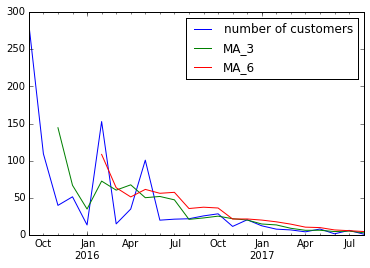

In [21]:
df_customers[['number of customers','MA_3','MA_6']].plot()

In [19]:
df_customers

,log number of customers,number of customers,MA_3,MA_6
2015-09-30,5.648399,283.836557,NaN,NaN
2015-10-31,4.695292,109.430801,NaN,NaN
2015-11-30,3.691070,40.087731,144.451696,NaN
2015-12-31,3.944098,51.629746,67.049426,NaN
2016-01-31,2.621050,13.750151,35.155876,NaN
2016-02-29,5.028775,152.745774,72.708557,108.580127
2016-03-31,2.722155,15.213075,60.569667,63.809546
2016-04-30,3.560721,35.188569,67.715806,51.435841
2016-05-31,4.613551,100.841572,50.414405,61.561481
2016-06-30,3.005827,20.202916,52.077686,56.323676


Add a column profits to the dataframe


In [22]:
df_customers['price'] = vector_p[1:]

In [24]:
df_customers.head()


,log number of customers,number of customers,MA_3,MA_6,price
2015-09-30,5.648399,283.836557,NaN,NaN,0.2
2015-10-31,4.695292,109.430801,NaN,NaN,0.2
2015-11-30,3.691070,40.087731,144.451696,NaN,0.2
2015-12-31,3.944098,51.629746,67.049426,NaN,0.2
2016-01-31,2.621050,13.750151,35.155876,NaN,0.2


assume that your costs equal 0.1; calculate profits


In [24]:
costs = 0.1
df_customers['profits'] = (df_customers['price']-costs)*df_customers['number of customers']

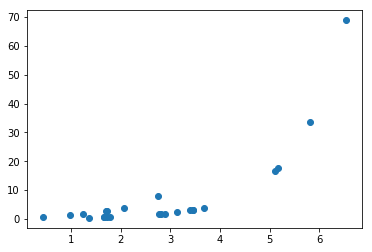

In [31]:
plt.scatter(df_customers['log number of customers'],df_customers['profits'])
plt.show()

In [15]:
pd.__version__

u'0.17.0'